http://mp3montaignebdx.legtux.org/Cours/Cours_electrocinetique/

http://mp3montaignebdx.legtux.org/Cours/Cours_electrocinetique/Traitement_numerique_signaux.pdf

http://mp3montaignebdx.legtux.org/Cours/Cours_electrocinetique/Filtrage_numerique_version_2_boucles.py


https://perso.esiee.fr/~bercherj/Python/DistribsTP/distrib_filt_elem/Corrigé_TP_Filtrage_elem.html


http://www.f-legrand.fr/scidoc/docimg/sciphys/electro/filtrespb/filtrespb.html

http://www.f-legrand.fr/scidoc/docmml/numerique/filtre/filtrenum/filtrenum.html


http://people.rennes.inria.fr/Olivier.Sentieys/teach/filtragepourlesnuls.pdf

https://homepages.laas.fr/adoncesc/SystemEmbed/Filtrage.pdf

https://www.unilim.fr/pages_perso/vahid/filter/cours_digital.pdf

https://martinos.org/mne/stable/auto_tutorials/plot_artifacts_correction_filtering.html

https://docs.scipy.org/doc/scipy/reference/signal.html

https://scipy-cookbook.readthedocs.io/items/FIRFilter.html

https://scitools.org.uk/iris/docs/v1.2/examples/graphics/SOI_filtering.html

https://groups.google.com/forum/#!topic/julia-users/gd84tGoNtBw

https://fr.wikipedia.org/wiki/Filtre_num%C3%A9rique

https://fr.wikipedia.org/wiki/Filtre_passe-bas

In [1]:
from numpy import cos, sin, pi, absolute, arange
from scipy.signal import kaiserord, lfilter, firwin, freqz
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.5/dist-packages/scipy/signal/signaltools.py:1336: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]


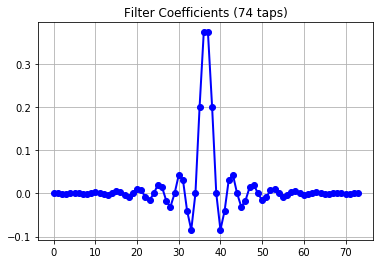

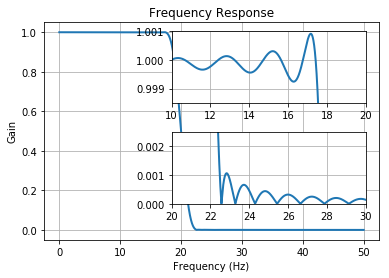

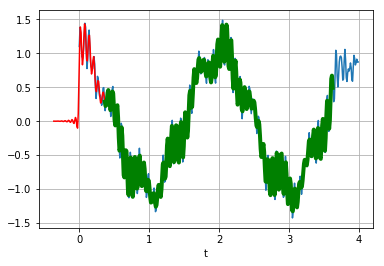

In [2]:
#------------------------------------------------
# Create a signal for demonstration.
#------------------------------------------------

sample_rate = 100.0
nsamples = 400
t = arange(nsamples) / sample_rate
x = cos(2*pi*0.5*t) + 0.2*sin(2*pi*2.5*t+0.1) + \
        0.2*sin(2*pi*15.3*t) + 0.1*sin(2*pi*16.7*t + 0.1) + \
            0.1*sin(2*pi*23.45*t+.8)


#------------------------------------------------
# Create a FIR filter and apply it to x.
#------------------------------------------------

# The Nyquist rate of the signal.
nyq_rate = sample_rate / 2.0

# The desired width of the transition from pass to stop,
# relative to the Nyquist rate.  We'll design the filter
# with a 5 Hz transition width.
width = 5.0/nyq_rate

# The desired attenuation in the stop band, in dB.
ripple_db = 60.0

# Compute the order and Kaiser parameter for the FIR filter.
N, beta = kaiserord(ripple_db, width)

# The cutoff frequency of the filter.
cutoff_hz = 20.0

# Use firwin with a Kaiser window to create a lowpass FIR filter.
taps = firwin(N, cutoff_hz/nyq_rate, window=('kaiser', beta))

# Use lfilter to filter x with the FIR filter.
filtered_x = lfilter(taps, 1.0, x)

#------------------------------------------------
# Plot the FIR filter coefficients.
#------------------------------------------------

plt.figure(1)
plt.plot(taps, 'bo-', linewidth=2)
plt.title('Filter Coefficients (%d taps)' % N)
plt.grid(True)

#------------------------------------------------
# Plot the magnitude response of the filter.
#------------------------------------------------

plt.figure(2)
plt.clf()
w, h = freqz(taps, worN=8000)
plt.plot((w/pi)*nyq_rate, absolute(h), linewidth=2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.title('Frequency Response')
plt.ylim(-0.05, 1.05)
plt.grid(True)

# Upper inset plot.
ax1 = plt.axes([0.42, 0.6, .45, .25])
plt.plot((w/pi)*nyq_rate, absolute(h), linewidth=2)
plt.xlim(10,20)
plt.ylim(0.9985, 1.001)
plt.grid(True)

# Lower inset plot
ax2 = plt.axes([0.42, 0.25, .45, .25])
plt.plot((w/pi)*nyq_rate, absolute(h), linewidth=2)
plt.xlim(20, 30)
plt.ylim(0.0, 0.0025)
plt.grid(True)

#------------------------------------------------
# Plot the original and filtered signals.
#------------------------------------------------

# The phase delay of the filtered signal.
delay = 0.5 * (N-1) / sample_rate

plt.figure(3)
# Plot the original signal.
plt.plot(t, x)
# Plot the filtered signal, shifted to compensate for the phase delay.
plt.plot(t-delay, filtered_x, 'r-')
# Plot just the "good" part of the filtered signal.  The first N-1
# samples are "corrupted" by the initial conditions.
plt.plot(t[N-1:]-delay, filtered_x[N-1:], 'g', linewidth=4)

plt.xlabel('t')
plt.grid(True)

plt.show()


In [3]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

In [4]:
from ANEMO import ANEMO

In [5]:
import pickle
with open('parametre/param_Fit_AM_fct_velocity_2_step_False_whitening.pkl', 'rb') as fichier :
    param = pickle.load(fichier, encoding='latin1')
with open('data/enregistrement_AM_2017-10-23_100057.pkl', 'rb') as fichier :
    exp = pickle.load(fichier, encoding='latin1')

In [6]:
import os
from ANEMO import read_edf
resultats = os.path.join('data', 'enregistrement_AM_2017-10-23_100057.asc')
data = read_edf(resultats, 'TRIALID')


In [7]:
A = ANEMO(exp)
Plot = ANEMO.Plot(exp)

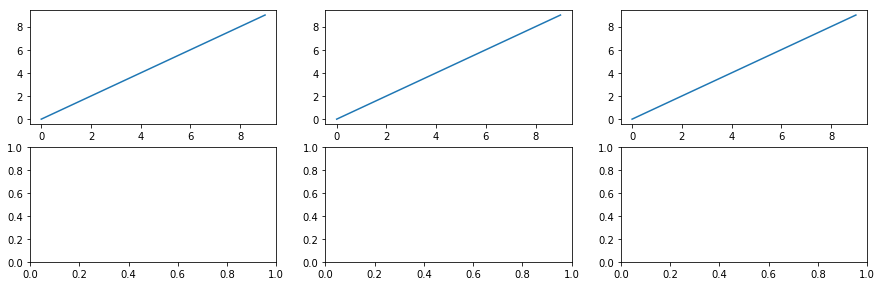

In [15]:
fig1, axs1 = plt.subplots(2, 3, figsize=(15, 1*(15*1/2)/1.6180))
for x in range(len(axs1[0])) :
    axs1[0,x].plot(range(10))

In [70]:
def figure(N_trial, N_block=1,bruit=8, plot='') :

    nb_trial = N_trial*N_block
    
    #x = np.arange(0,1500,1)
    #TargetOn, StimulusOf = 750, 750-300
    #np.random.seed(7)
    
    fig, axs = plt.subplots(nb_trial, 1, figsize=(15, nb_trial*(15*1/2)/1.6180))
    fig1, axs1 = plt.subplots(nb_trial, 3, figsize=(15, nb_trial*(15*1/2)/1.6180))
    
    
    for block in range(N_block) :
        
        for trial in range(N_trial) :
            
            
            trial_data = trial + 200*block
            arg = A.arg(data[trial_data], trial=trial, block=block)
            test = A.velocity_NAN(**arg)[0]
            time = arg.trackertime - arg.TargetOn
            
            dir_target = exp['p'][trial][block][0]*2-1
            
            #test = ANEMO.Equation.fct_velocity(x, dir_target, param['start_anti'][block][trial]+TargetOn, param['v_anti'][block][trial], param['latence'][block][trial]+TargetOn, param['tau'][block][trial], param['maxi'][block][trial], do_whitening=False)
            #test = test + np.random.rand(len(x))*bruit
            #test = test-np.random.rand(len(x))*bruit

            if nb_trial==1 : ax = axs ; ax1 = axs1
            else : ax = axs[trial] ; ax1 = axs1[trial]

            
            ax.plot(time, test, c='k', alpha=0.5)
            
            #ax = Plot.deco(ax, StimulusOn=0, StimulusOf=StimulusOf, TargetOn=TargetOn, TargetOff=1400, t_label=10, saccades=[])
            ax = Plot.deco(ax, **arg)
            
            ax.set_ylabel('Velocity (°/s)', fontsize=10)
            ax.set_title('block %s, trial %s'%(block, trial))

            # Filtre moyenneur
            #-----------------------------------------------------------
            # Filtre g qui calcule la moyenne sur une période de 40 points
            L=10
            g=np.ones(L)/L
            m_estimee=signal.lfilter(g,1,test)
            ax.plot(time, m_estimee, c='r')
            '''# On vérifie quelle est l'allure de G(f)
            G=fftshift(fft(g,1000))
            figure(4)
            plot(freq(1000),abs(G))
            xlim([-0.5, 0.5])
            xlabel('Fréquences (réduites)')
            title('Fonction de transfert du filtre moyenneur')
            '''
            
            
            #Donnees numeriques 
            Te=1/1000 #Période d'échantillonnage
            wc=2*np.pi*50 #Pulsation de coupure des passe-bas et passe-haut
            
            spb1, sph1 = np.zeros(len(test)), np.zeros(len(test))
            #Ecriture des signaux de sortie des filtres par récurrence
            for k in range(len(test)-1):
                if np.isnan(test[k]) :
                    spb1[k+1]= 0
                    sph1[k+1]= 0
                else :   
                    spb1[k+1]=((2-wc*Te)/(2+wc*Te))*spb1[k]+((wc*Te)/(2+wc*Te))*(test[k]+test[k+1]) #récurrence du passe-bas
                    sph1[k+1]=((2-wc*Te)/(2+wc*Te))*sph1[k]+(2/(2+wc*Te))*(test[k+1]-test[k])  #récurrence du passe-haut

            for k in range(len(test)-1):
                if np.isnan(test[k]) :
                    test[k] = 0
                    spb1[k+1]= np.nan
                    sph1[k+1]= np.nan
            

            ax.plot(time, spb1, c='c')
            #ax.plot(time, sph1, c='g', alpha=0.5)
            
            #########################################################################
            #########################################################################
            #------------------------------------------------
            # Create a signal for demonstration.
            #------------------------------------------------
            sample_rate = 1000 #100.0
            nsamples = len(time) #400
            t = time # arange(nsamples) / sample_rate
            x = test
            '''x = cos(2*pi*0.5*t) + 0.2*sin(2*pi*2.5*t+0.1) + \
                    0.2*sin(2*pi*15.3*t) + 0.1*sin(2*pi*16.7*t + 0.1) + \
                        0.1*sin(2*pi*23.45*t+.8)'''
            
            #------------------------------------------------
            # Create a FIR filter and apply it to x.
            #------------------------------------------------
            nyq_rate = sample_rate / 2.0 # The Nyquist rate of the signal.
            width = 5.0/nyq_rate # The desired width of the transition from pass to stop, relative to the Nyquist rate.  We'll design the filter with a 5 Hz transition width.
            ripple_db = 60.0 # The desired attenuation in the stop band, in dB.
            N, beta = kaiserord(ripple_db, width) # Compute the order and Kaiser parameter for the FIR filter.
            cutoff_hz = 50.0 # The cutoff frequency of the filter.
            taps = firwin(N, cutoff_hz/nyq_rate, window=('kaiser', beta)) # Use firwin with a Kaiser window to create a lowpass FIR filter.
            filtered_x = lfilter(taps, 1.0, x) # Use lfilter to filter x with the FIR filter.

            #------------------------------------------------
            # Plot the FIR filter coefficients.
            #------------------------------------------------            
            ax1[0].plot(taps, 'b', linewidth=2)
            ax1[0].set_title('Filter Coefficients (%d taps)' %N)
            ax1[0].grid(True)

            #------------------------------------------------
            # Plot the magnitude response of the filter.
            #------------------------------------------------
            w, h = freqz(taps, worN=8000)
            ax1[1].plot((w/pi)*nyq_rate, absolute(h), linewidth=2)
            ax1[1].set_xlabel('Frequency (Hz)')
            ax1[1].set_ylabel('Gain')
            ax1[1].set_title('Frequency Response')
            ax1[1].set_ylim(-0.05, 1.05)
            ax1[1].grid(True)

            # Upper inset plot.
            ax_1 = plt.axes([0.5, 0.85-(trial*0.5), .45/3, .25/3])
            ax_1.plot((w/pi)*nyq_rate, absolute(h), linewidth=2)
            ax_1.set_xlim(10,20)
            ax_1.set_ylim(0.9985, 1.001)
            ax_1.grid(True)

            # Lower inset plot
            ax_2 = plt.axes([0.5, 0.7-(trial*0.5), .45/3, .25/3])
            ax_2.plot((w/pi)*nyq_rate, absolute(h), linewidth=2)
            ax_2.set_xlim(20, 30)
            ax_2.set_ylim(0.0, 0.0025)
            ax_2.grid(True)

            #------------------------------------------------
            # Plot the original and filtered signals.
            #------------------------------------------------
            delay = 0.5 * (N-1) / sample_rate # The phase delay of the filtered signal.
            ax1[2].plot(t, x) # Plot the original signal.
            ax1[2].plot(t-delay, filtered_x, 'r-') # Plot the filtered signal, shifted to compensate for the phase delay.
            #ax1[2].plot(t[N-1:]-delay, filtered_x[N-1:], 'g', linewidth=4) # Plot just the "good" part of the filtered signal.  The first N-1 samples are "corrupted" by the initial conditions.
            ax1[2].set_xlabel('t')
            ax1[2].grid(True)

            plt.tight_layout()

/usr/local/lib/python3.5/dist-packages/scipy/signal/signaltools.py:1336: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


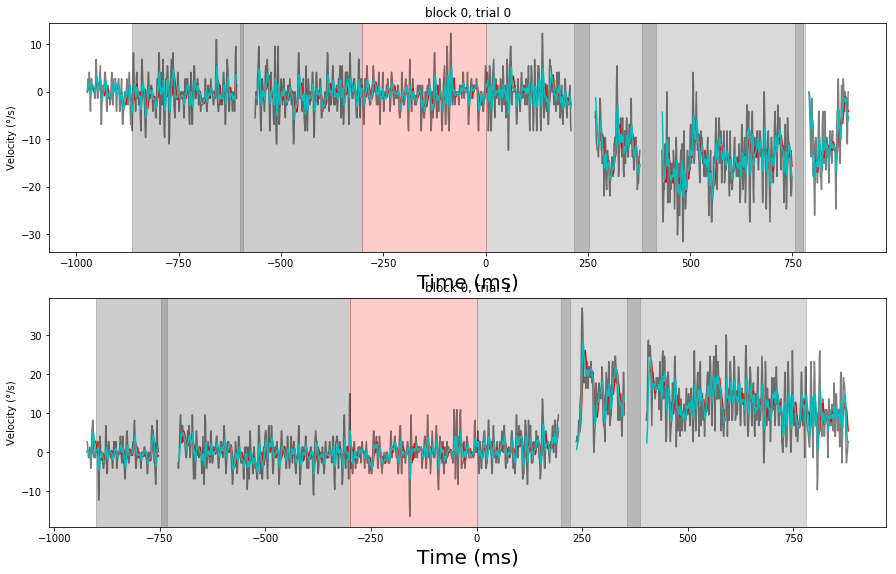

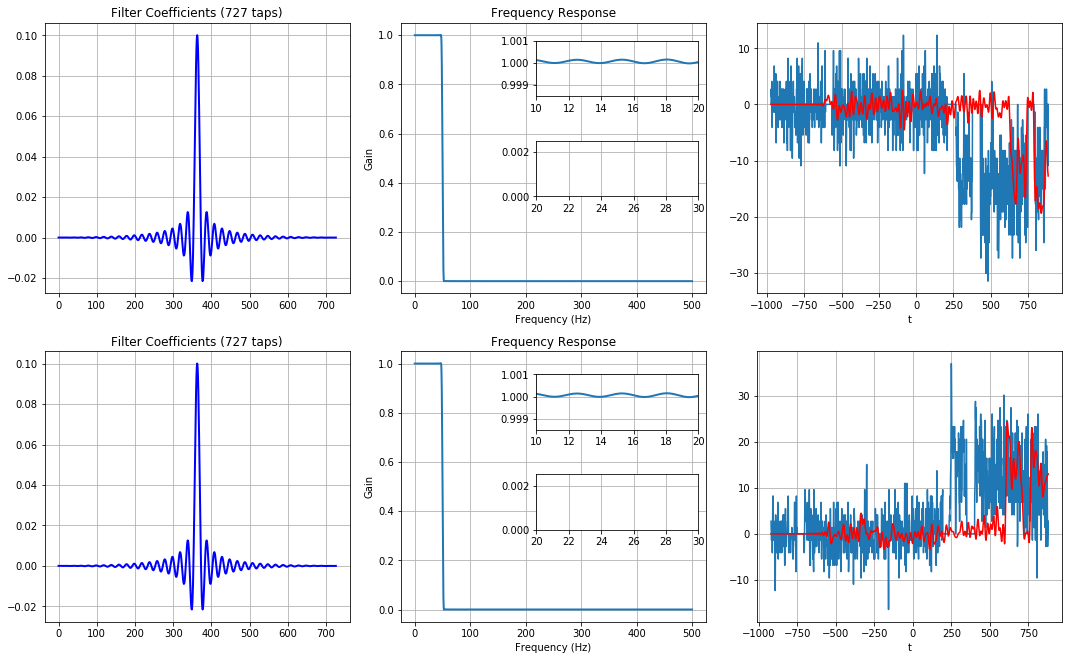

In [71]:
figure(2, N_block=1,bruit=8, plot='')

[0.00041655 0.00124964 0.00124964 0.00041655] [ 1.         -2.6861574   2.41965511 -0.73016535]


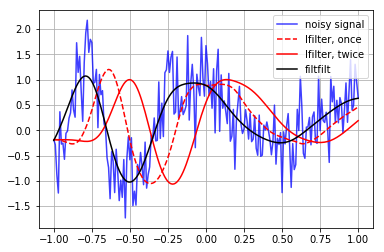

In [8]:
'''
https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html
https://docs.scipy.org/doc/scipy/reference/signal.html
'''

t = np.linspace(-1, 1, 201)
x = (np.sin(2*np.pi*0.75*t*(1-t) + 2.1) +
     0.1*np.sin(2*np.pi*1.25*t + 1) +
     0.18*np.cos(2*np.pi*3.85*t))
xn = x + np.random.randn(len(t)) * 0.5

#Create an order 3 lowpass butterworth filter:
b, a = signal.butter(3, 0.05)
print(b,a)
#Apply the filter to xn. Use lfilter_zi to choose the initial condition of the filter:
zi = signal.lfilter_zi(b, a)
z, _ = signal.lfilter(b, a, xn, zi=zi*xn[0])

#Apply the filter again, to have a result filtered at an order the same as filtfilt:
z2, _ = signal.lfilter(b, a, z, zi=zi*z[0])

#Use filtfilt to apply the filter:
y = signal.filtfilt(b, a, xn)

#Plot the original signal and the various filtered versions:
plt.figure
plt.plot(t, xn, 'b', alpha=0.75)
plt.plot(t, z, 'r--', t, z2, 'r', t, y, 'k')
plt.legend(('noisy signal', 'lfilter, once', 'lfilter, twice',
            'filtfilt'), loc='best')
plt.grid(True)
plt.show()

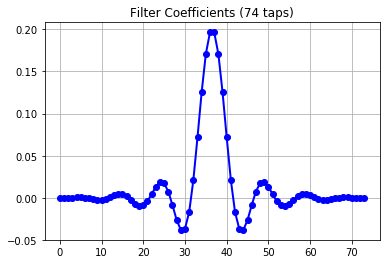

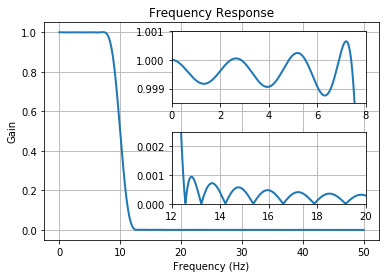

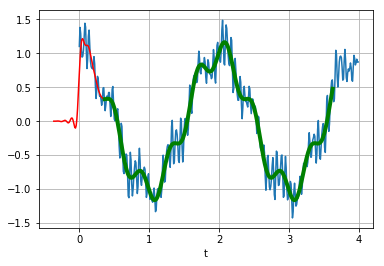

In [9]:
#!python

from numpy import cos, sin, pi, absolute, arange
from scipy.signal import kaiserord, lfilter, firwin, freqz
import matplotlib.pyplot as plt
#from pylab import figure, clf, plot, xlabel, ylabel, xlim, ylim, title, grid, axes, show


#------------------------------------------------
# Create a signal for demonstration.
#------------------------------------------------

sample_rate = 100.0
nsamples = 400
t = arange(nsamples) / sample_rate
x = cos(2*pi*0.5*t) + 0.2*sin(2*pi*2.5*t+0.1) + \
        0.2*sin(2*pi*15.3*t) + 0.1*sin(2*pi*16.7*t + 0.1) + \
            0.1*sin(2*pi*23.45*t+.8)


#------------------------------------------------
# Create a FIR filter and apply it to x.
#------------------------------------------------

# The Nyquist rate of the signal.
nyq_rate = sample_rate / 2.0

# The desired width of the transition from pass to stop,
# relative to the Nyquist rate.  We'll design the filter
# with a 5 Hz transition width.
width = 5.0/nyq_rate

# The desired attenuation in the stop band, in dB.
ripple_db = 60.0

# Compute the order and Kaiser parameter for the FIR filter.
N, beta = kaiserord(ripple_db, width)

# The cutoff frequency of the filter.
cutoff_hz = 10.0

# Use firwin with a Kaiser window to create a lowpass FIR filter.
taps = firwin(N, cutoff_hz/nyq_rate, window=('kaiser', beta))

# Use lfilter to filter x with the FIR filter.
filtered_x = lfilter(taps, 1.0, x)

#------------------------------------------------
# Plot the FIR filter coefficients.
#------------------------------------------------

plt.figure(1)
plt.plot(taps, 'bo-', linewidth=2)
plt.title('Filter Coefficients (%d taps)' % N)
plt.grid(True)

#------------------------------------------------
# Plot the magnitude response of the filter.
#------------------------------------------------

plt.figure(2)
plt.clf()
w, h = freqz(taps, worN=8000)
plt.plot((w/pi)*nyq_rate, absolute(h), linewidth=2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.title('Frequency Response')
plt.ylim(-0.05, 1.05)
plt.grid(True)

# Upper inset plot.
ax1 = plt.axes([0.42, 0.6, .45, .25])
plt.plot((w/pi)*nyq_rate, absolute(h), linewidth=2)
plt.xlim(0,8.0)
plt.ylim(0.9985, 1.001)
plt.grid(True)

# Lower inset plot
ax2 = plt.axes([0.42, 0.25, .45, .25])
plt.plot((w/pi)*nyq_rate, absolute(h), linewidth=2)
plt.xlim(12.0, 20.0)
plt.ylim(0.0, 0.0025)
plt.grid(True)

#------------------------------------------------
# Plot the original and filtered signals.
#------------------------------------------------

# The phase delay of the filtered signal.
delay = 0.5 * (N-1) / sample_rate

plt.figure(3)
# Plot the original signal.
plt.plot(t, x)
# Plot the filtered signal, shifted to compensate for the phase delay.
plt.plot(t-delay, filtered_x, 'r-')
# Plot just the "good" part of the filtered signal.  The first N-1
# samples are "corrupted" by the initial conditions.
plt.plot(t[N-1:]-delay, filtered_x[N-1:], 'g', linewidth=4)

plt.xlabel('t')
plt.grid(True)

plt.show()